# Welcome to Logistic Regression.
### We urge you to play around with the code, change values and try and see the immense capabiltites of this simple model!

#### Importing important dependencies.
Pandas is used to import and manipulate data; <br>
Numpy is used for most matrix realted math; <br>
Matplotlib is used for plotting our results; <br>
Scipy is an ML library to help us optimize our function.

In [1]:
# Import required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

### Part 1 The Data
Let's begin by loading and visualizing the data.<br>
We've provided three different data sets for you to play with!

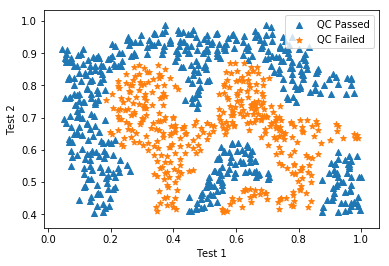

In [13]:
# Load and visualise data
#data = pd.read_csv('../../Data/Chips.csv')
data = pd.read_csv('../../Data/Logistic_eg1.csv')
#data = pd.read_csv('../../Data/Logistic_eg2.csv')

QC_Passed_Mask = data.query('QC_OK==1')
QC_Failed_Mask = data.query('QC_OK==0')

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.scatter(QC_Passed_Mask['Test 1'], QC_Passed_Mask['Test 2'], marker = '^', label = 'QC Passed')
plt.scatter(QC_Failed_Mask['Test 1'], QC_Failed_Mask['Test 2'], marker = '*', label = 'QC Failed')
plt.legend(loc = 1)

plt.show()


### Part 2 The Functions.
A few functions have been defined below to help you understand how logistic regression works. <br>
Again, we urge you to go through the code, change a few things around, add print statments in between to check stuff and just get a feel of the code and what it does.

**Map Features** creates more polynomial features from 1D data. 

In [14]:
def map_features(data, deg = 6):
    features = pd.DataFrame([1]*data.shape[0], columns=[0])
    ctr = 1
    for i in range(1, deg+1):
        for j in range(i+1):
            temp = data[:,0]**(i-j)*(data[:,1]**j)
            try:
                features[ctr] = temp.values
            except AttributeError:
                features[ctr] = temp
            ctr += 1
    return features

In [15]:
Y = np.array(data.QC_OK)
X = np.array(data.drop('QC_OK', axis = 1))

The **draw** function plots the complex, high order polynomial on the data and helps us see the curve that the machine has predicted.

In [16]:
def draw(X, theta, accuracy, lam, deg = 6):
    plt.scatter(QC_Passed_Mask['Test 1'], QC_Passed_Mask['Test 2'], marker = '^', label = 'QC Passed')
    plt.scatter(QC_Failed_Mask['Test 1'], QC_Failed_Mask['Test 2'], marker = '*', label = 'QC Failed')
    plt.legend(loc = 1)
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(map_features(np.c_[xx1.ravel(), xx2.ravel()], deg).dot(theta))
    h = h.values.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), lam))
    plt.show()

The activation function for logistic regression, the **sigmoid** function.<br>
The function is defined as $ sigmoid (x) = \frac{1}{1-e^{-x}}$

In [17]:
def sigmoid(x):
    ans = 1/(1+np.exp(-x))
    return ans

A simple function to test if the sigmoid function works.

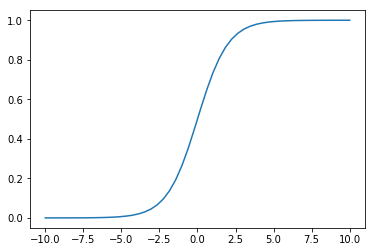

In [18]:
def draw_sigmoid():
    x = np.linspace(-10, 10)
    y = sigmoid(x)
    plt.plot(x, y)
    plt.show()
draw_sigmoid()

##### Time for the important stuff!<br>
The cost function for logistic regression as discussed before is mentioned below.<br>
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta^2_j$

In [19]:
def cost_function(theta, lam, X, y):
    h_theta = sigmoid(np.dot(X, theta))    
    log_l = (-y)*np.log(h_theta) - (1 - y)*np.log(1 - h_theta)
    return log_l.mean() + (lam/(2*len(y)))*np.sum(np.square(theta[1:]))

The grad_calculate finds the differential of the cost function and facilitates the convergence of thetas to a accurate value.<br>
$\frac{\delta{J}(\theta)}{\delta\theta_0} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$ for $j = 0$ <br><br>
$\frac{\delta{J}(\theta)}{\delta\theta_0} = (\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}) + \frac{\lambda}{m}$ for $j >= 1$

In [20]:
def grad_calculate(theta, lam, X, y):
    h_theta = sigmoid(np.dot(X, theta))
    temp = (h_theta - y).reshape(y.shape[0],1)
    grad = np.dot(np.transpose(X), temp)/y.shape[0] + (lam/len(y))*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return grad

The predict function acts as $H_\theta(X)$. Given an X and a set of theta, it predicts the y value.

In [21]:
def predict(Theta, x, threshold = 0.5, deg = 6):
    data = map_features(x, deg)
    y = np.dot(data, Theta)
    y = sigmoid(np.dot(data, Theta))
    y[y > threshold] = 1
    y[y <= threshold] = 0
    return y

### Part 3 The Fun!
This is where the magic happens.<br>
You are free to change the *lam*, *deg*, *initial\_theta* values to visually see what kind of an effect it has on the prediction.

In [28]:
lam = 0
deg = 6
x = map_features(X, deg)
initial_theta = np.zeros(x.shape[1])

# The optimization function repeatedly chooses a set of theta, finds the costs and updates till a constant accuracy is reached.
Result = op.minimize(fun = cost_function, x0 = initial_theta, args = (lam, x, Y), method = 'TNC', jac = grad_calculate)
theta = Result.x
x.shape

(863, 28)

(28,) (863, 2)


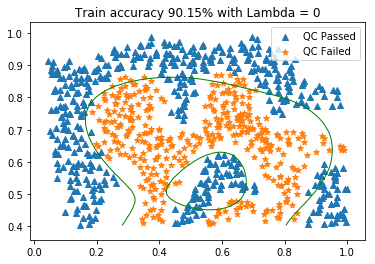

90.15063731170336

In [29]:
print(theta.shape, X.shape)
pred = predict(theta, X, deg = deg)
accuracy = 100*sum(pred == Y.ravel())/Y.size
draw(X, theta, accuracy, lam, deg)
accuracy
